# Plots

In [1]:
import matplotlib.transforms as transforms
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from skimage import metrics
from math import pi
import numpy as np
import os

In [2]:
## Loading all 4 generations of Predicted and Ground Truth validaiton dataset of Model 2
path = os.path.abspath('..')

GT_G0,  PD_G0  = np.load(path+'/Step_3_predictions/model_3_results/GEN-0.npy',) # allow_pickle=True)
GT_G1,  PD_G1  = np.load(path+'/Step_3_predictions/model_3_results/GEN-1.npy',) # allow_pickle=True)
GT_G2,  PD_G2  = np.load(path+'/Step_3_predictions/model_3_results/GEN-2.npy',) # allow_pickle=True)
GT_G3,  PD_G3  = np.load(path+'/Step_3_predictions/model_3_results/GEN-3.npy',) # allow_pickle=True)

def scale_array(arr):
    arr_min = np.min(arr)  ## Flattens the array and finds the min value inside it
    arr_max = np.max(arr)  ## Flattens the array and finds the max value inside it
    scaled_array = (arr - arr_min) / (arr_max - arr_min) * 255
    scaled_array = scaled_array.astype(np.uint8)
    
    return scaled_array

GT_G0_scaled, PD_G0_scaled = scale_array(GT_G0), scale_array(PD_G0)
GT_G1_scaled, PD_G1_scaled = scale_array(GT_G1), scale_array(PD_G1)
GT_G2_scaled, PD_G2_scaled = scale_array(GT_G2), scale_array(PD_G2)
GT_G3_scaled, PD_G3_scaled = scale_array(GT_G3), scale_array(PD_G3)

GT_G0.shape, PD_G0.shape, GT_G1.shape, PD_G1.shape, GT_G2.shape, PD_G2.shape, GT_G3.shape, PD_G3.shape

((137, 15, 64, 64, 1),
 (137, 15, 64, 64, 1),
 (137, 14, 64, 64, 1),
 (137, 14, 64, 64, 1),
 (137, 13, 64, 64, 1),
 (137, 13, 64, 64, 1),
 (137, 12, 64, 64, 1),
 (137, 12, 64, 64, 1))

## $\mu_{SIM}$ Generational

In [3]:
a, b, c, d, e = GT_G0.shape[0], GT_G0.shape[1], GT_G0.shape[2], GT_G0.shape[3], GT_G0.shape[4] 

## For Individual Image Frames
rmse_g0 = np.zeros((a,b))
ssim_g0 = np.zeros((a,b))

for i in range(GT_G0_scaled.shape[0]):
  for j in range(GT_G0_scaled.shape[1]):
    rmse_g0[i][j] = metrics.normalized_root_mse(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0])
    ssim_g0[i][j] = metrics.structural_similarity(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0], win_size=13)


## For Individual Video Sequence (17 frames)
rmse_g0_vs = np.zeros((a))
ssim_g0_vs = np.zeros((a))

for i in range(GT_G0_scaled.shape[0]):
  # for j in range(GT_G0_scaled.shape[1]):
  rmse_g0_vs[i] = metrics.normalized_root_mse(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0])
  ssim_g0_vs[i] = metrics.structural_similarity(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0], win_size=13)


rmse_g0_all = metrics.normalized_root_mse(GT_G0_scaled, PD_G0_scaled)
ssim_g0_all = metrics.structural_similarity(GT_G0_scaled[:,:,:,:,0], PD_G0_scaled[:,:,:,:,0], win_size=13)

In [4]:
a, b, c, d, e = GT_G1.shape[0], GT_G1.shape[1], GT_G1.shape[2], GT_G1.shape[3], GT_G1.shape[4] 

## For Individual Image Frames

rmse_g1 = np.zeros((a,b))
ssim_g1 = np.zeros((a,b))

for i in range(GT_G1_scaled.shape[0]):
  for j in range(GT_G1_scaled.shape[1]):
    rmse_g1[i][j] = metrics.normalized_root_mse(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0])
    ssim_g1[i][j] = metrics.structural_similarity(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0], win_size=5)

## For Individual Video Sequence (17 frames)
rmse_g1_vs = np.zeros((a))
ssim_g1_vs = np.zeros((a))

for i in range(GT_G1_scaled.shape[0]):
  # for j in range(GT_G1_scaled.shape[1]):
    rmse_g1_vs[i] = metrics.normalized_root_mse(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0])
    ssim_g1_vs[i] = metrics.structural_similarity(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0], win_size=5)


## For ALL Validation set at once
rmse_g1_all = metrics.normalized_root_mse(GT_G1_scaled, PD_G1_scaled)
ssim_g1_all = metrics.structural_similarity(GT_G1_scaled[:,:,:,:,0], PD_G1_scaled[:,:,:,:,0], win_size=5)

In [5]:
a, b, c, d, e = GT_G2.shape[0], GT_G2.shape[1], GT_G2.shape[2], GT_G2.shape[3], GT_G2.shape[4] 

## For Individual Image Frames
rmse_g2 = np.zeros((a,b))
ssim_g2 = np.zeros((a,b))

for i in range(GT_G2_scaled.shape[0]):
  for j in range(GT_G2_scaled.shape[1]):
    rmse_g2[i][j] = metrics.normalized_root_mse(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0])
    ssim_g2[i][j] = metrics.structural_similarity(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0], win_size=5)


## For Individual Video Sequence (17 frames)
rmse_g2_vs = np.zeros((a))
ssim_g2_vs = np.zeros((a))

for i in range(GT_G2_scaled.shape[0]):
  # for j in range(GT_G2_scaled.shape[1]):
  rmse_g2_vs[i] = metrics.normalized_root_mse(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0])
  ssim_g2_vs[i] = metrics.structural_similarity(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0], win_size=5)

## For ALL Validation set at once
rmse_g2_all = metrics.normalized_root_mse(GT_G2_scaled, PD_G2_scaled)
ssim_g2_all = metrics.structural_similarity(GT_G2_scaled[:,:,:,:,0], PD_G2_scaled[:,:,:,:,0], win_size=5)

In [6]:
a, b, c, d, e = GT_G3.shape[0], GT_G3.shape[1], GT_G3.shape[2], GT_G3.shape[3], GT_G3.shape[4] 

## For Individual Image Frames
rmse_g3 = np.zeros((a,b))
ssim_g3 = np.zeros((a,b))

for i in range(GT_G3_scaled.shape[0]):
  for j in range(GT_G3_scaled.shape[1]):
    rmse_g3[i][j] = metrics.normalized_root_mse(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0])
    ssim_g3[i][j] = metrics.structural_similarity(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0], win_size=5)

## For Individual Video Sequence (12 frames)
rmse_g3_vs = np.zeros((a))
ssim_g3_vs = np.zeros((a))

for i in range(GT_G3_scaled.shape[0]):
  # for j in range(GT_G3_scaled.shape[1]):
  rmse_g3_vs[i] = metrics.normalized_root_mse(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0])
  ssim_g3_vs[i] = metrics.structural_similarity(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0], win_size=5)

## For ALL Validation set at once
rmse_g3_all = metrics.normalized_root_mse(GT_G3_scaled, PD_G3_scaled)
ssim_g3_all = metrics.structural_similarity(GT_G3_scaled[:,:,:,:,0], PD_G3_scaled[:,:,:,:,0], win_size=5)

In [8]:
array_list = [ssim_g0_vs.tolist(), ssim_g1_vs.tolist(), [ssim_g0_all], [ssim_g1_all.tolist()], rmse_g0_vs.tolist(), rmse_g1_vs.tolist(), [rmse_g0_all.tolist()], [rmse_g1_all.tolist()] ]

max_len = max(len(inner_list) for inner_list in array_list)

ssim_rmse_2gens_A3 = np.zeros((len(array_list), max_len), dtype=float)

for i, inner_list in enumerate(array_list):
    ssim_rmse_2gens_A3[i, :len(inner_list)] = inner_list

# np.save(path+'/Step_4_quantification/Step_3_best_model_selection/ssim_rmse_2gens_A3.npy', ssim_rmse_2gens_A3)

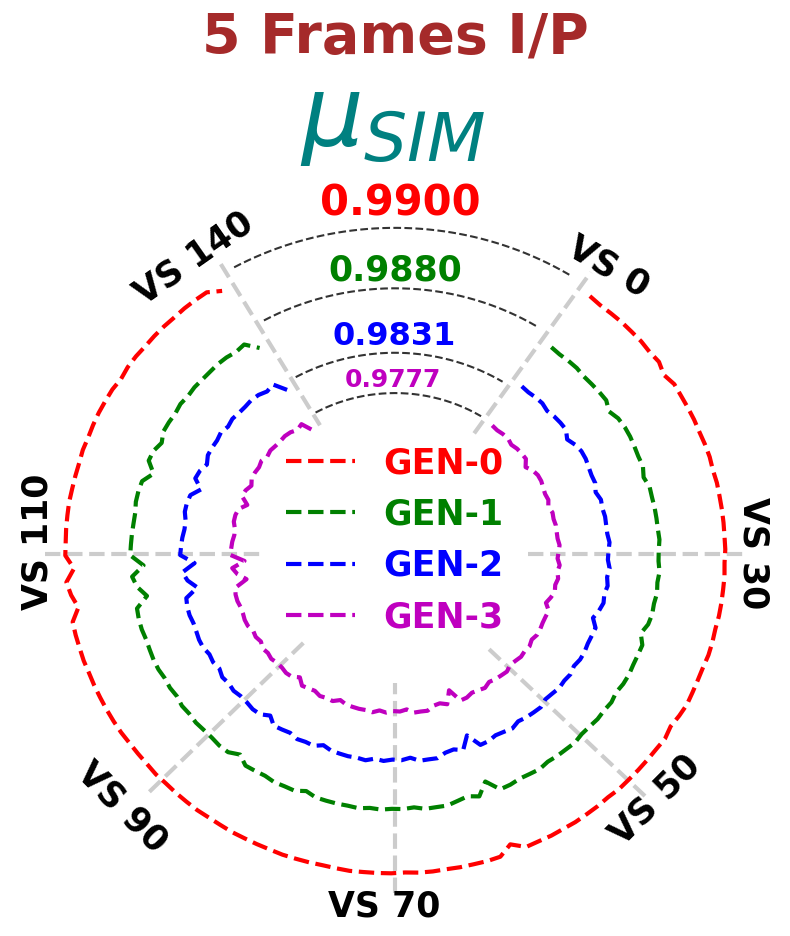

In [70]:
def wrap_around(radii, s,):
    thetas = [i * (330 / len(radii)) for i in range(15, len(radii))]
    xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    return xs,ys

def labels(radii, s,):
    thetas = [i * (60 / len(radii)) for i in range(-65, len(radii))]
    xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    return  xs,ys


x0,y0 = wrap_around(ssim_g0_vs, s=20)
x1,y1 = wrap_around(ssim_g1_vs, s=16)
x2,y2 = wrap_around(ssim_g2_vs, s=13)
x3,y3 = wrap_around(ssim_g3_vs, s=10)

a =  np.ones(len(ssim_g0_vs))
l0 = labels(a , 20.25)
l1 = labels(a , 16.5)
l2 = labels(a , 12.5)
l3 = labels(a , 10)
l4 = labels(a , 5)

plt.rcParams["figure.figsize"] = (8,9.5)

plt.plot([4.75, 11.75], [7.5, 17.5], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(10, 16, s="VS 0", color='k',fontsize=25, weight = 'bold', rotation=-30)
plt.hlines(y=0, xmin=8, xmax=21,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
plt.text(20.5, -3, s="VS 30", color='k',fontsize=25, weight = 'bold', rotation=270)
plt.plot([15, 5.5], [-15, -5.75], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(12.5, -18, s="VS 50", color='k',fontsize=25, weight = 'bold', rotation=45)
plt.vlines(x=0, ymin=-21, ymax=-8,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
plt.text(-4, -22.5, s="VS 70", color='k',fontsize=25, weight = 'bold', rotation=0)
plt.plot([-5.5, -15], [-5.5, -15], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(-19.5, -18.5, s="VS 90", color='k',fontsize=25, weight = 'bold', rotation=-45)
plt.hlines(y=0, xmin=-21, xmax=-8,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
plt.text(-22.5, -3, s="VS 110", color='k',fontsize=25, weight = 'bold', rotation=90)
plt.plot([-10.45, -4.5], [18, 8], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(-16, 15.5, s="VS 140", color='k',fontsize=25, weight = 'bold', rotation=35)


plt.plot(x0, y0, '--', color='red', label=r'GEN-0', linewidth=3, markersize=5)
plt.plot(x1, y1, '--', color='green', label=r'GEN-1', linewidth=3, markersize=5)
plt.plot(x2, y2, '--', color='blue', label=r'GEN-2', linewidth=3, markersize=5)
plt.plot(x3, y3, '--', color='m', label=r'GEN-3', linewidth=3, markersize=5)

l0 = plt.plot(l0[0], l0[1], '--', color = 'black', alpha=0.8)
l1 = plt.plot(l1[0], l1[1], '--', color = 'black', alpha=0.8)
l2 = plt.plot(l2[0], l2[1], '--', color = 'black', alpha=0.8)
l3 = plt.plot(l3[0], l3[1], '--', color = 'black', alpha=0.8)
l4 = plt.plot(l4[0], l4[1], '--', color = 'white', alpha=0)


plt.text(-4.5, 21,  s=f"{np.mean(ssim_g0_all):.3F}0", color='red',fontsize=30, weight = 'bold')
plt.text(-4.0, 17,  s=f"{np.mean(ssim_g1_vs):.4F}", color='green',fontsize=25, weight = 'bold')
plt.text(-3.75, 13, s=f"{np.mean(ssim_g2_vs):.4F}", color='blue',fontsize=23, weight = 'bold')
plt.text(-3, 10.35, s=f"{np.mean(ssim_g3_vs):.4F}", color='m',fontsize=18, weight = 'bold')

plt.legend(loc=(0.34,0.38), prop={'weight':'bold', 'size':'25'}, frameon=False, labelcolor='linecolor').get_frame().set_facecolor('none')

plt.title(r"$\mu_{SIM}$ ", loc='center', color='teal',fontsize=70, weight = 'bold', rotation=0, pad=35)

plt.suptitle(r"5 Frames I/P",  color='brown',fontsize=40, weight = 'bold', rotation=0,)

plt.axis(False)
plt.tight_layout()

plt.savefig(path+'/Step_4_quantification/figures_M3/mu_SIM_A3.png', transparent=True)

# plt.grid()
plt.show()

